### Exploration of the Iris Data Set using Logistic Regression

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [2]:
# importing the dataset
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


The data frame has 150 rows & 6 columns, but the the 'Id' column is just a duplicate of the index so it can be dropped.

In [3]:
df.drop('Id', axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Here, we would like to  create a classifier that will predict whether an iris belongs to the ‘Iris-setosa', 'Iris-versicolor', or 'Iris-virginica' species. First, we check that, out of 150 rows, there are 50 rows for each of the three species (below).

In [4]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

We then generated three classes for each species. Therefore, ‘Iris-setosa' is encoded as 0, 'Iris-versicolor' is encoded as 1, and 'Iris-virginica' are encoded as 2 (below).

In [5]:
df['Species'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df['Species'].apply(pd.to_numeric, errors='coerce')
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

Next, the dependent variable ('Species') & independent variables ('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', & 'PetalWidthCm') were defined. The data were scaled & then split into test set (75%) and training set (25%). A logistic regression model was then built using the test set & a prediction was made on the test set.

In [6]:
x = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:,4].values

x = x.reshape(-1, 4)
x = preprocessing.scale(x) #scale the data so that it is easier to fit

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [7]:
# fit a model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# make predictions on test data
y_pred = log_reg.predict(x_test).reshape(-1,1)

To gain an indication of the model's performance, a confusion matrix was generated.

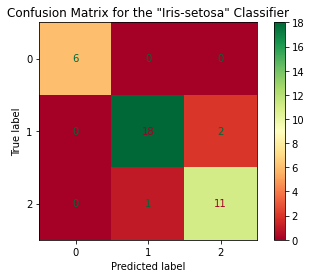

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_mtx = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(6,4))
display = ConfusionMatrixDisplay(conf_mtx, display_labels=log_reg.classes_)
ax.set(title='Confusion Matrix for the "Iris-setosa" Classifier')
display.plot(ax=ax, cmap='RdYlGn')
plt.show()

For the most part, the classifier can classify entries in y_test as either belonging to 'Iris-setosa' (0), Iris-versicolor' (1), or 'Iris-virginica' (2). There is a small number of data where 'Iris-versicolor' (1) is classified as 'Iris-virginica' (2). Because of this, the accuracy, precision, and recall scores for 'Iris-virginica' will likely be less than 1.0 (but still likely to be quite hight). To calculate the various scores, first, a data frame containing the predicted labels & the true labels is constructed (below).

In [13]:
y_pred_lst = [int(j) for j in y_pred]

y_pred_y_test = {'True Label': y_test.tolist(), 'Predicted Label': y_pred_lst}
y_pred_y_test = pd.DataFrame(y_pred_y_test)
y_pred_y_test.head()

,True Label,Predicted Label
0,1,1
1,1,1
2,2,2
3,1,1
4,0,0


Then the number of true positives, fals positives, true negatives, and false negatives are defined. Afterwards, the accuracy, precision & recall scores for "Iris-virginica" are calculated below.

In [15]:
true_positive = len(y_pred_y_test[(y_pred_y_test['True Label'] == 2) & (y_pred_y_test['Predicted Label'] == 2)])
false_positive = len(y_pred_y_test[(y_pred_y_test['True Label'] != 2) & (y_pred_y_test['Predicted Label'] == 2)])
true_negative = len(y_pred_y_test[(y_pred_y_test['True Label'] != 2) & (y_pred_y_test['Predicted Label'] != 2)])
false_negative = len(y_pred_y_test[(y_pred_y_test['True Label'] == 2) & (y_pred_y_test['Predicted Label'] != 2)])

print(f'The number of true positives (TP) is: {true_positive}')
print(f'The number of false positives (FP) is: {false_positive}')
print(f'The number of true negatives (TN) is: {true_negative}')
print(f'The number of false negatives (FN) is: {false_negative}')

The number of true positives (TP) is: 11
The number of false positives (FP) is: 2
The number of true negatives (TN) is: 24
The number of false negatives (FN) is: 1


In [16]:
accuracy_score = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
precision_score =  true_positive / (true_positive + false_positive)
recall_score = true_positive / (true_positive + false_negative)

print(f'The accuracy of this model is: {accuracy_score}')
print(f'The precision of this model is: {precision_score}')
print(f'The recall score for this model is: {recall_score}')

The accuracy of this model is: 0.9210526315789473
The precision of this model is: 0.8461538461538461
The recall score for this model is: 0.9166666666666666


As predicted, the accuracy, precision, and recall scores are below 1.0 but are still high (accuracy = 0.921, precision = 0.846, recall = 0.917).